In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')


# Set the path to the root directory
path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(path)

# Import the data
df_read = pd.read_csv(path + '/data/predictions/predictions_2015_v5_3.csv')

2023-04-14 13:32:09.191881: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = df_read.copy()
display(df.head())

,Unnamed: 0,Quote_date,Price,Prediction,Underlying_last,Strike,TTM,R
0,1023548,2015-01-02,1107.250,1108.47200,2058.69,950.0,7,0.02
1,1023549,2015-01-02,1057.250,1058.42770,2058.69,1000.0,7,0.02
2,1023550,2015-01-02,1007.250,1008.42487,2058.69,1050.0,7,0.02
3,1023551,2015-01-02,957.095,958.38940,2058.69,1100.0,7,0.02
4,1023552,2015-01-02,907.140,908.50195,2058.69,1150.0,7,0.02


2023-04-14 13:32:29.341068: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Group:
        Unnamed: 0  Quote_date     Price  Prediction  Underlying_last  Strike  \
10900      1035860  2015-01-08  1112.500   1112.5536          2062.00   950.0   
10901      1035861  2015-01-08  1062.500   1062.5700          2062.00  1000.0   
10902      1035862  2015-01-08  1012.500   1012.7552          2062.00  1050.0   
10903      1035863  2015-01-08   962.495    962.9903          2062.00  1100.0   
10904      1035864  2015-01-08   912.550    913.2072          2062.00  1150.0   
...            ...         ...       ...         ...              ...     ...   
850900     1989911  2015-12-30     0.025      0.0000          2063.23  2245.0   
850901     1989912  2015-12-30     0.025      0.0000          2063.23  2250.0   
850902     1989913  2015-12-30     0.020      0.0000          2063.23  2275.0   
850903     1989914  2015-12-30     0.025      0.0000          2063.23  2300.0   
850904     1989915  2015-12-30     0.025      0.0000          2063.23  2325.0   

        TTM     R  


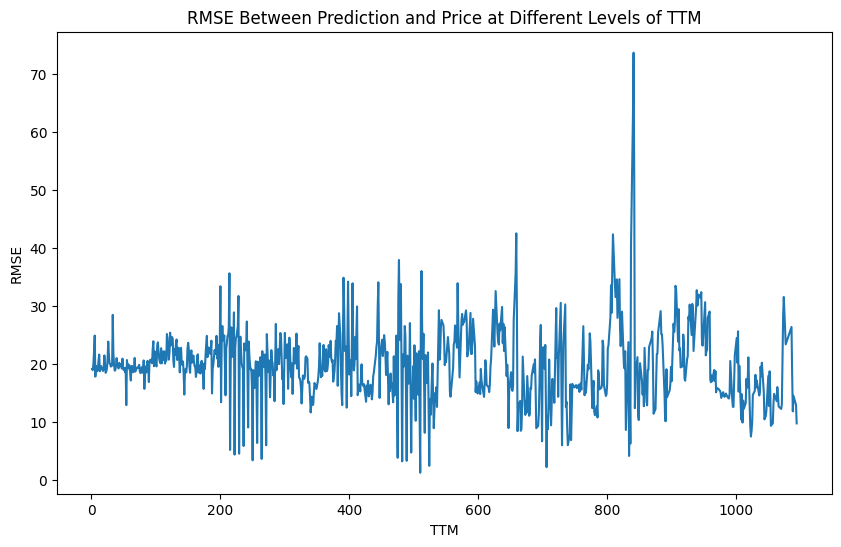

In [3]:
# Graph the RSME between prediction and price for different levels of TTM
def calculate_rmse(group):
    mse = tf.keras.losses.MSE(group['Price'], group['Prediction'])
    rmse = np.sqrt(mse)
    print(f"Group:\n{group}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    return rmse

rmse_by_ttm = df.groupby('TTM').apply(calculate_rmse).reset_index(name='RMSE')

plt.figure(figsize=(10, 6))
sns.lineplot(x='TTM', y='RMSE', data=rmse_by_ttm)
plt.title("RMSE Between Prediction and Price at Different Levels of TTM")
plt.xlabel("TTM")
plt.ylabel("RMSE")
plt.show()

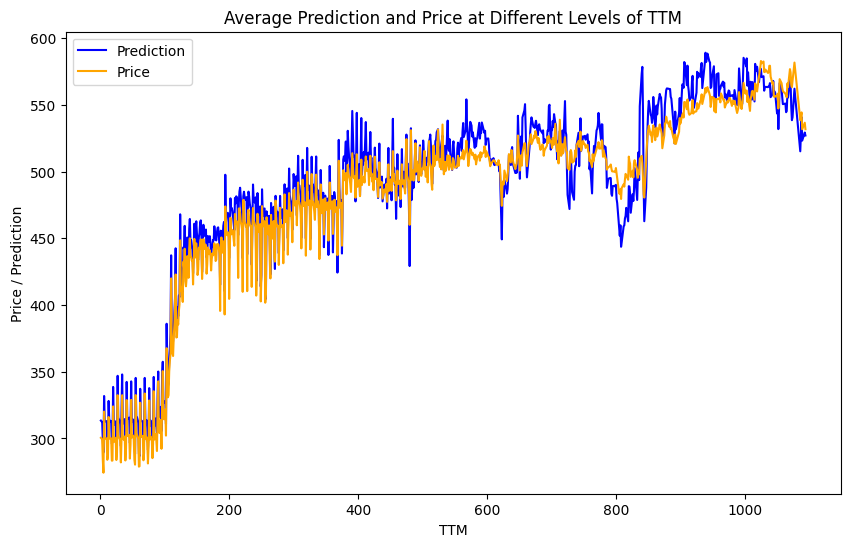

In [4]:
def calculate_average(group):
    average_prediction = group['Prediction'].mean()
    average_price = group['Price'].mean()
    return pd.Series({'Average Prediction': average_prediction, 'Average Price': average_price})

average_by_ttm = df.groupby('TTM').apply(calculate_average).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='TTM', y='Average Prediction', data=average_by_ttm, color='blue', label='Prediction')
sns.lineplot(x='TTM', y='Average Price', data=average_by_ttm, color='orange', label='Price')
plt.title("Average Prediction and Price at Different Levels of TTM")
plt.xlabel("TTM")
plt.ylabel("Price / Prediction")
plt.legend()
plt.show()


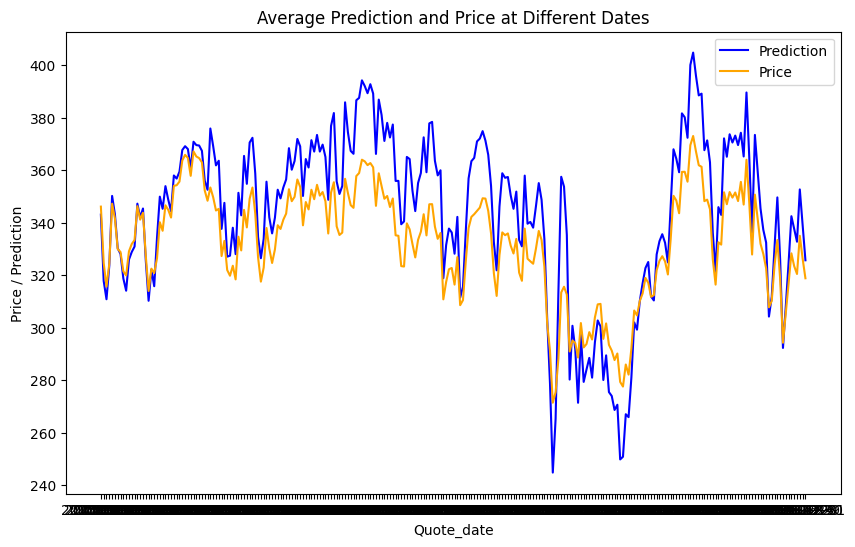

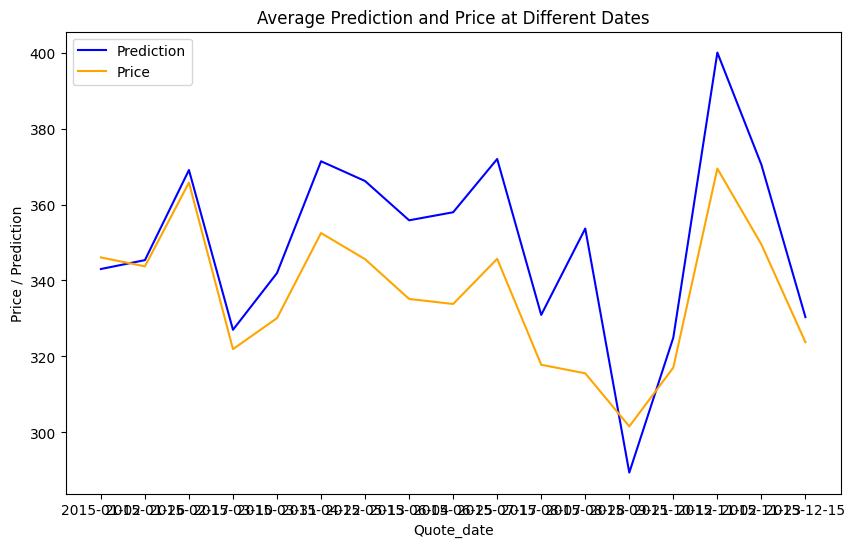

In [5]:
# Plot the average prediction and price for different dates
def calculate_average(group):
    average_prediction = group['Prediction'].mean()
    average_price = group['Price'].mean()
    return pd.Series({'Average Prediction': average_prediction, 'Average Price': average_price})

average_by_date = df.groupby('Quote_date').apply(calculate_average).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Quote_date', y='Average Prediction', data=average_by_date, color='blue', label='Prediction')
sns.lineplot(x='Quote_date', y='Average Price', data=average_by_date, color='orange', label='Price')
plt.title("Average Prediction and Price at Different Dates")
plt.xlabel("Quote_date")
plt.ylabel("Price / Prediction")
plt.legend()
plt.show()

# Decrease the number of dates to make the graph more readable

# Get the dates
dates = average_by_date['Quote_date'].unique()

# Get the dates to keep
dates_to_keep = []
for i in range(0, len(dates), 15):
    dates_to_keep.append(dates[i])

# Filter the dataframe
average_by_date = average_by_date[average_by_date['Quote_date'].isin(dates_to_keep)]

plt.figure(figsize=(10, 6))
sns.lineplot(x='Quote_date', y='Average Prediction', data=average_by_date, color='blue', label='Prediction')
sns.lineplot(x='Quote_date', y='Average Price', data=average_by_date, color='orange', label='Price')
plt.title("Average Prediction and Price at Different Dates")
plt.xlabel("Quote_date")
plt.ylabel("Price / Prediction")
plt.legend()
plt.show()



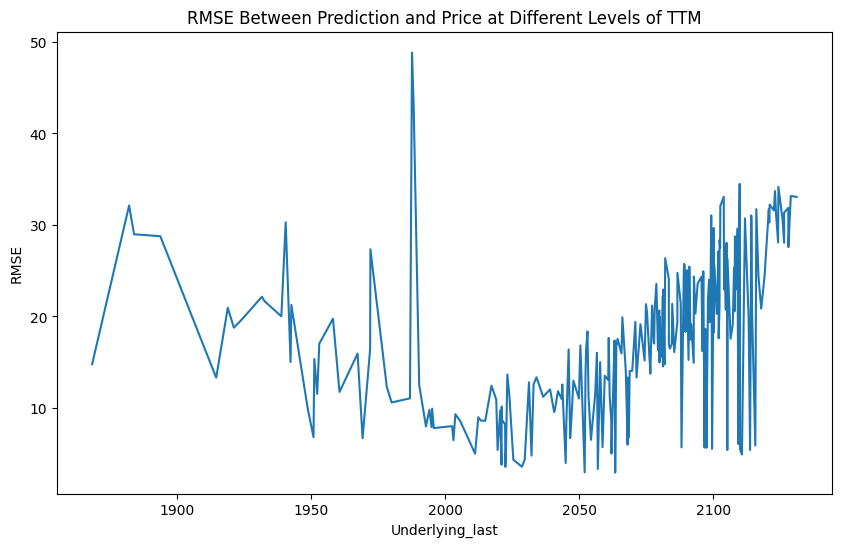

In [6]:
# Graph the RSME between prediction and price for different levels of TTM
def calculate_rmse(group):
    rmse = np.sqrt(tf.keras.losses.MSE(group['Price'], group['Prediction']))
    return rmse

rmse_by_ttm = df.groupby('Underlying_last').apply(calculate_rmse).reset_index(name='RMSE')

plt.figure(figsize=(10, 6))
sns.lineplot(x='Underlying_last', y='RMSE', data=rmse_by_ttm)
plt.title("RMSE Between Prediction and Price at Different Levels of TTM")
plt.xlabel("Underlying_last")
plt.ylabel("RMSE")
plt.show()

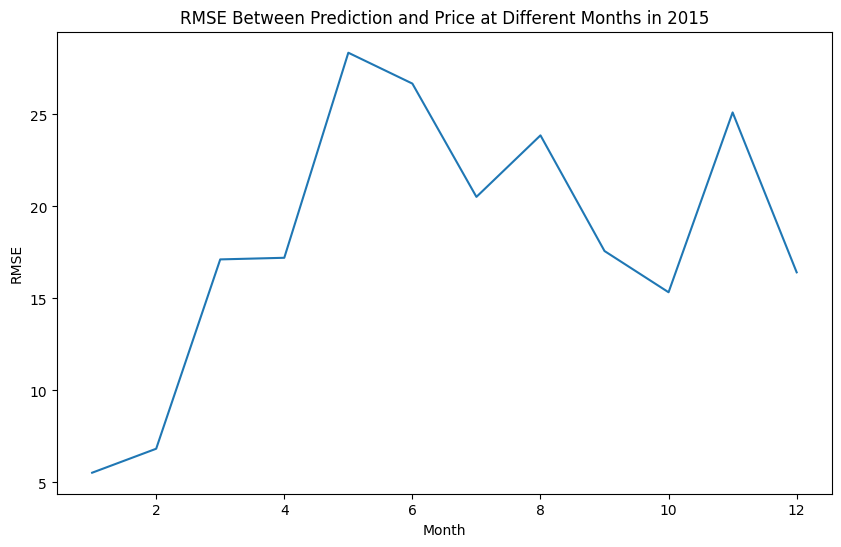

In [7]:
# Plot RMSE for each month

# Determining month based on Quote_date

def get_month(date):
    return int(date.split('-')[1])

df['Month'] = df['Quote_date'].apply(get_month)

# Plot RMSE for each month
rmse_by_month = df.groupby('Month').apply(calculate_rmse).reset_index(name='RMSE')

plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='RMSE', data=rmse_by_month)
plt.title("RMSE Between Prediction and Price at Different Months in 2015")
plt.xlabel("Month")
plt.ylabel("RMSE")
plt.show()


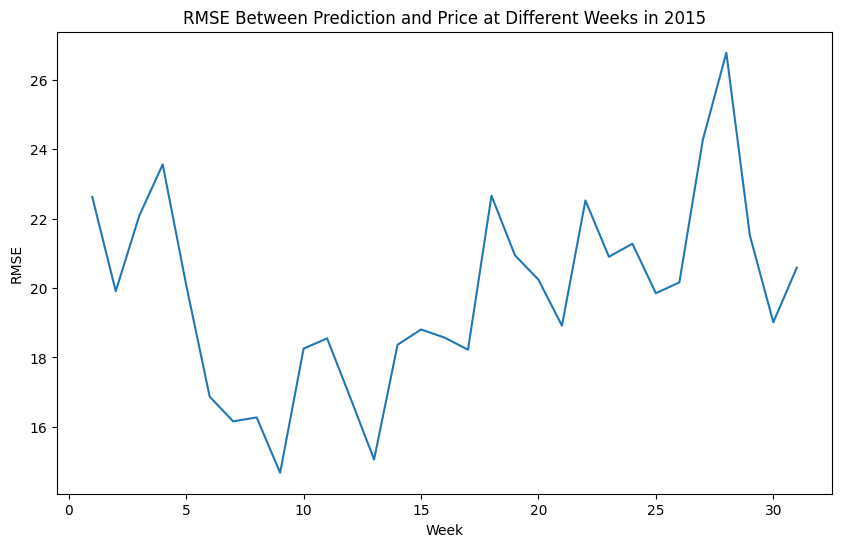

Average RMSE: 19.92486889983417


In [8]:
# Plot RMSE for each week

# Determining week based on Quote_date

def get_week(date):
    return int(date.split('-')[2])

df['Week'] = df['Quote_date'].apply(get_week)

# Plot RMSE for each week
rmse_by_week = df.groupby('Week').apply(calculate_rmse).reset_index(name='RMSE')

plt.figure(figsize=(10, 6))
sns.lineplot(x='Week', y='RMSE', data=rmse_by_week)
plt.title("RMSE Between Prediction and Price at Different Weeks in 2015")
plt.xlabel("Week")
plt.ylabel("RMSE")
plt.show()

# Print average RMSE for the whole dataset
print(f"Average RMSE: {calculate_rmse(df)}")

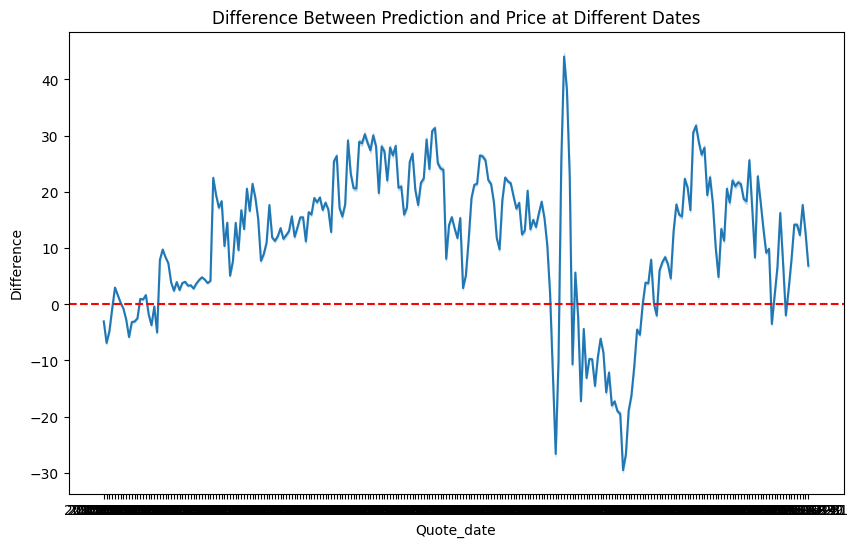

Average difference: 11.57735538849395


In [9]:
# Plot prediction minus price for each day

# Calculate the difference between prediction and price
df['Difference'] = df['Prediction'] - df['Price']




# Plot the difference for each day
plt.figure(figsize=(10, 6))
sns.lineplot(x='Quote_date', y='Difference', data=df)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Difference Between Prediction and Price at Different Dates")
plt.xlabel("Quote_date")
plt.ylabel("Difference")
plt.show()

# Print the average difference
print(f"Average difference: {df['Difference'].mean()}")